In [1]:
from tqdm import notebook
from dataset import *
from utils import *
from softmax import *
from mlp import *
from cnn import *

In [2]:
def train():
    train_loss = 0
    train_acc = 0
    batch_num = len(train_loader)
    
    for i, item in enumerate(train_loader):
        data, label = item[0].float().to(device), item[1].reshape(-1).to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(output, 1) == label).sum().item()
    
    return train_loss / (batch_num * batch_size), train_acc / (batch_num * batch_size)

def test():
    test_loss = 0
    test_acc = 0
    batch_num = len(test_loader)

    for i, item in enumerate(test_loader):
        data, label = item[0].float().to(device), item[1].reshape(-1).to(device)
        with torch.no_grad():
            output = model(data)
            loss = criterion(output, label)
            test_loss += loss.item()
            test_acc += (torch.argmax(output, 1) == label).sum().item()
    return test_loss / (batch_num * batch_size), test_acc / (batch_num * batch_size)

In [3]:
train_data, train_label, test_data, test_label = load_data(filepath=file_path)

isLinear = True
if(model_name == 'cnn'):
    isLinear = False

train_loader = myDataLoader(train_data, train_label, isLinear)

test_loader = myDataLoader(test_data, test_label, isLinear)

criterion = torch.nn.CrossEntropyLoss()

if(model_name == 'linear'):
    model = Softmax(input_dim, num_class).to(device)
elif(model_name == 'mlp'):
    model = MLP(input_dim, num_class, hidden_dim).to(device)
elif(model_name == 'cnn'):
    model = LeNet5(num_class).to(device)

if(optimizer_name == 'sgd'):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
elif(optimizer_name == 'sgdm'):
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
elif(optimizer_name == 'adam'):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

train_result = []
test_result = []
train_max_acc, test_max_acc = 0, 0

  0%|          | 0/200 [00:00<?, ?it/s]

epochs:  0
train: -loss: 26.3849  -acc: 0.2125
test:  -loss: 27.9599  -acc: 0.1969
epochs:  1
train: -loss: 22.7432  -acc: 0.2405
test:  -loss: 16.2824  -acc: 0.2853
epochs:  2
train: -loss: 22.3958  -acc: 0.2473
test:  -loss: 24.0553  -acc: 0.2100
epochs:  3
train: -loss: 21.0443  -acc: 0.2570
test:  -loss: 19.1703  -acc: 0.2740
epochs:  4
train: -loss: 21.2125  -acc: 0.2575
test:  -loss: 27.8807  -acc: 0.2465
epochs:  5
train: -loss: 20.8571  -acc: 0.2613
test:  -loss: 19.9119  -acc: 0.3005
epochs:  6
train: -loss: 21.1685  -acc: 0.2599
test:  -loss: 24.9243  -acc: 0.2404
epochs:  7
train: -loss: 20.5744  -acc: 0.2636
test:  -loss: 18.6124  -acc: 0.2422
epochs:  8
train: -loss: 20.2447  -acc: 0.2677
test:  -loss: 11.9312  -acc: 0.3432
epochs:  9
train: -loss: 20.3095  -acc: 0.2674
test:  -loss: 28.1530  -acc: 0.2560
epochs:  10
train: -loss: 19.8507  -acc: 0.2731
test:  -loss: 19.2787  -acc: 0.2442
epochs:  11
train: -loss: 20.3709  -acc: 0.2705
test:  -loss: 23.1401  -acc: 0.2462
ep

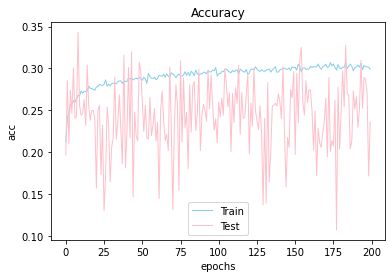

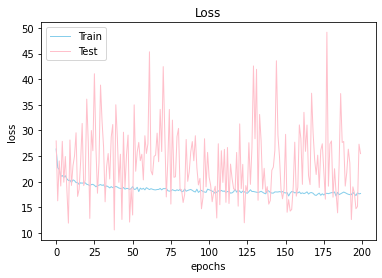

In [4]:
for i in notebook.tqdm(range(200)):
    train_result.append(train())
    test_result.append(test())
    train_max_acc = max(train_max_acc, train_result[-1][1])
    test_max_acc = max(test_max_acc, test_result[-1][1])
    print('epochs: ', i)
    print('train: -loss: %.4f  -acc: %.4f' %train_result[-1])
    print('test:  -loss: %.4f  -acc: %.4f' %test_result[-1])

print('train_max_acc: %.4f' %train_max_acc)
print('test_max_acc:  %.4f' %test_max_acc)
file_name = str(optimizer_name) + '_' + 'doublek' + '_' + str(batch_size) + '_' + str(learning_rate) + '_'
plot_result(model_name, file_name, train_result, test_result)

In [5]:
write_file('../result/linear/' + file_name + '.txt', train_result, test_result)

In [7]:
train_result_1, test_result_1 = read_file('../result/linear/' + 'sgd_32_0.0001_.txt')
train_result_2, test_result_2 = read_file('../result/mlp/' + 'sgd_32_3_100_0.0001_.txt')
train_result_3, test_result_3 = read_file('../result/cnn/' + 'sgd_32_0.0001_.txt')

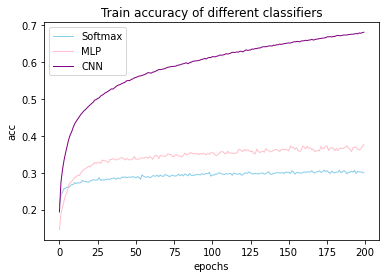

In [12]:
plt.plot([i[1] for i in train_result_1], color='skyblue', label='Softmax', linewidth=1)
plt.plot([i[1] for i in train_result_2], color='pink', label='MLP', linewidth=1)
plt.plot([i[1] for i in train_result_3], color='purple', label='CNN', linewidth=1)
plt.title('Train accuracy of different classifiers')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.savefig('../result/' + 'clf_train_acc.png')
plt.show()

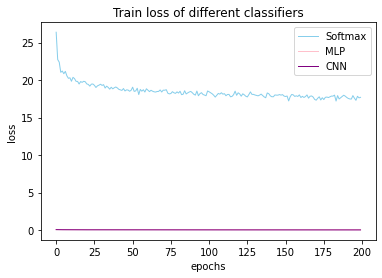

In [13]:
plt.plot([i[0] for i in train_result_1], color='skyblue', label='Softmax', linewidth=1)
plt.plot([i[0] for i in train_result_2], color='pink', label='MLP', linewidth=1)
plt.plot([i[0] for i in train_result_3], color='purple', label='CNN', linewidth=1)
plt.title('Train loss of different classifiers')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('../result/' + 'clf_train_loss.png')
plt.show()

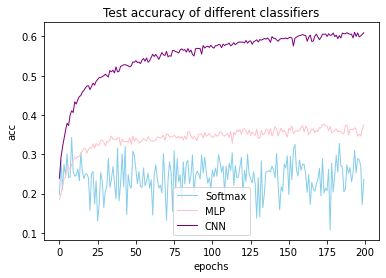

In [14]:
plt.plot([i[1] for i in test_result_1], color='skyblue', label='Softmax', linewidth=1)
plt.plot([i[1] for i in test_result_2], color='pink', label='MLP', linewidth=1)
plt.plot([i[1] for i in test_result_3], color='purple', label='CNN', linewidth=1)
plt.title('Test accuracy of different classifiers')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.savefig('../result/' + 'clf_test_acc.png')
plt.show()

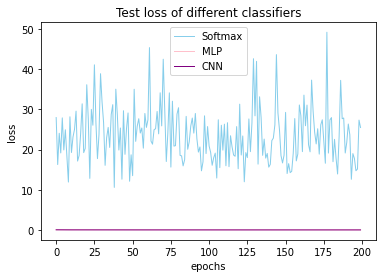

In [15]:
plt.plot([i[0] for i in test_result_1], color='skyblue', label='Softmax', linewidth=1)
plt.plot([i[0] for i in test_result_2], color='pink', label='MLP', linewidth=1)
plt.plot([i[0] for i in test_result_3], color='purple', label='CNN', linewidth=1)
plt.title('Test loss of different classifiers')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('../result/' + 'clf_test_loss.png')
plt.show()